In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Read dataset
df = pd.read_csv("agaricus-lepiota.data", header=None)

# Add column headers to dataframe
df.columns = ['toxicity',
              'cap-shape',
              'cap-surface',
              'cap-color',
              'bruises?',
              'odor',
              'gill-attachment',
              'gill-spacing',
              'gill-size',
              'gill-color',
              'stalk-shape',
              'stalk-root',
              'stalk-surface-above-ring',
              'stalk-surface-below-ring',
              'stalk-color-above-ring',
              'stalk-color-below-ring',
              'veil-type',
              'veil-color',
              'ring-number',
              'ring-type', 
              'spore-print-color',
              'population',
              'habitat'
            ]
df

toxicity cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0           p         x           s         n        t    p               f   
1           e         x           s         y        t    a               f   
2           e         b           s         w        t    l               f   
3           p         x           y         w        t    p               f   
4           e         x           s         g        f    n               f   
...       ...       ...         ...       ...      ...  ...             ...   
8119        e         k           s         n        f    n               a   
8120        e         x           s         n        f    n               a   
8121        e         f           s         n        f    n               a   
8122        p         k           y         n        f    y               f   
8123        e         x           s         n        f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

# Exploratory Data Analysis

          Count  Percentage
toxicity                   
e          4208        51.8
p          3916        48.2


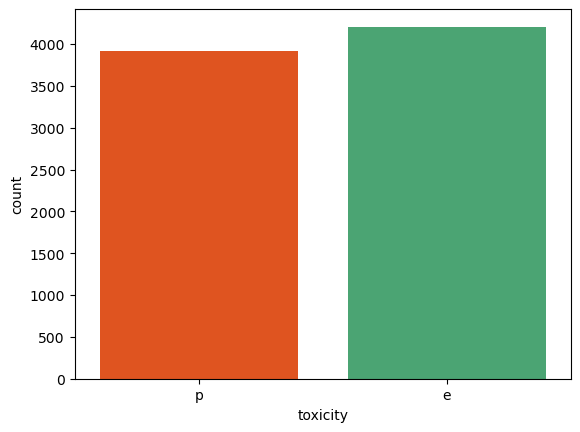

In [4]:
# Visualise the split between poisonous and edible mushrooms. Based on the countplot, the data is very balanced.
class_counts = df['toxicity'].value_counts()
class_percentages = class_counts/len(df)*100
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages.round(2)
})

print(class_distribution)
sns.countplot(data=df, x='toxicity', hue='toxicity', palette=['orangered','mediumseagreen']);

In [5]:
# Describe the dataset
df.describe()

toxicity cap-shape cap-surface cap-color bruises?  odor  \
count      8124      8124        8124      8124     8124  8124   
unique        2         6           4        10        2     9   
top           e         x           y         n        f     n   
freq       4208      3656        3244      2284     4748  3528   

       gill-attachment gill-spacing gill-size gill-color  ...  \
count             8124         8124      8124       8124  ...   
unique               2            2         2         12  ...   
top                  f            c         b          b  ...   
freq              7914         6812      5612       1728  ...   

       stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                           s                      w                      w   
freq                       4936                   4464                   4384   

       veil-type veil-color ring-number ring-type spore-print-color  \
count       8124       8124        8124      8124              8124   
unique         1          4           3         5                 9   
top            p          w           o         p                 w   
freq        8124       7924        7488      3968              2388   

       population habitat  
count        8124    8124  
unique          6       7  
top             v       d  
freq         4040    3148  

[4 rows x 23 columns]

In [6]:
# 'stalk-root' column contains missing values denoted by '?'

# Replace all '?' values in the 'stalk-root' column with null-values
df['stalk-root'] = df['stalk-root'].apply(lambda x: None if x == '?' else x)

# Count number of missing values in dataset
isna_counts = df.isna().sum()
isna_percentages = isna_counts/len(df)*100
pd.DataFrame({
    'Missing Count': isna_counts,
    'Missing Percentage': isna_percentages.round(2)
})

Missing Count  Missing Percentage
toxicity                              0                0.00
cap-shape                             0                0.00
cap-surface                           0                0.00
cap-color                             0                0.00
bruises?                              0                0.00
odor                                  0                0.00
gill-attachment                       0                0.00
gill-spacing                          0                0.00
gill-size                             0                0.00
gill-color                            0                0.00
stalk-shape                           0                0.00
stalk-root                         2480               30.53
stalk-surface-above-ring              0                0.00
stalk-surface-below-ring              0                0.00
stalk-color-above-ring                0                0.00
stalk-color-below-ring                0                0.00
veil-type                             0                0.00
veil-color                            0                0.00
ring-number                           0                0.00
ring-type                             0                0.00
spore-print-color                     0                0.00
population                            0                0.00
habitat                               0                0.00

Noted that 30.53% of the 'stalk-root' category contains missing values. Nevertheless, we will convert these missing values back to '?' for the purposes of our exploratory data analysis and feature engineering.

In [8]:
# Replace all null-values in the 'stalk-root' column with '?'
df['stalk-root'] = df['stalk-root'].fillna('?')

In [9]:
# Rename toxicity column values to edible and poisonous
df['toxicity'] = df['toxicity'].map({'e': 'edible', 'p': 'poisonous'})
df

toxicity cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0     poisonous         x           s         n        t    p               f   
1        edible         x           s         y        t    a               f   
2        edible         b           s         w        t    l               f   
3     poisonous         x           y         w        t    p               f   
4        edible         x           s         g        f    n               f   
...         ...       ...         ...       ...      ...  ...             ...   
8119     edible         k           s         n        f    n               a   
8120     edible         x           s         n        f    n               a   
8121     edible         f           s         n        f    n               a   
8122  poisonous         k           y         n        f    y               f   
8123     edible         x           s         n        f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

In [10]:
'''
Perform ordinal encoding for selected categorical columns

Toxicity - 0: edible ('e'), 1: poisonous ('p')
Bruises - 0: false ('f'), 1: true ('t')
Gill-spacing - 0: crowded ('w'), 1: close ('c'), 2: distant ('d')
Gill-size - 0: narrow ('n'), 1: broad ('b')
Ring-number - 0: none ('n'), 1: one ('o'), 2: two ('t')
Population - 0: solitary ('y'), 1: several ('v'), 2: scattered ('s'), 3: numerous ('n'), 4: clustered ('c'), 5: abundant ('a')
'''

# Create separate dataframe for selected ordinal features
df_num = pd.DataFrame(df[['toxicity', 'bruises?', 'gill-spacing', 'gill-size', 'ring-number', 'population']])

# Create ordinal mappings for each feature
toxicity_mapping = {'edible': 0, 'poisonous': 1}
bruises_mapping = {'f': 0, 't': 1}
gill_spacing_mapping = {'w': 0, 'c': 1, 'd': 2}
gill_size_mapping = {'n': 0, 'b': 1}
ring_num_mapping = {'n': 0, 'o': 1, 't': 2}
population_mapping = {'y': 0, 'v': 1, 's': 2, 'n': 3, 'c': 4, 'a': 5}

# Encode ordinal mappings
df_num['toxicity'] = df_num['toxicity'].map(toxicity_mapping)
df_num['bruises?'] = df_num['bruises?'].map(bruises_mapping)
df_num['gill-spacing'] = df_num['gill-spacing'].map(gill_spacing_mapping)
df_num['gill-size'] = df_num['gill-size'].map(gill_size_mapping)
df_num['ring-number'] = df_num['ring-number'].map(ring_num_mapping)
df_num['population'] = df_num['population'].map(population_mapping)

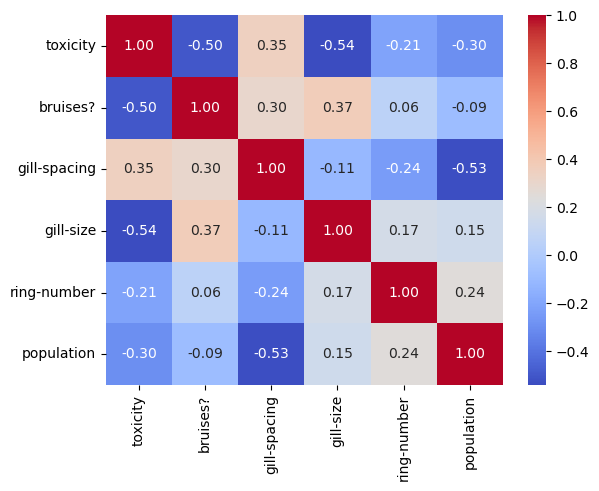

In [11]:
# Plot correlation heatmap
sns.heatmap(data=df_num.corr(), annot=True, fmt='.2f', cmap='coolwarm');
plt.show()

Make count plots for 22 categorical variables.

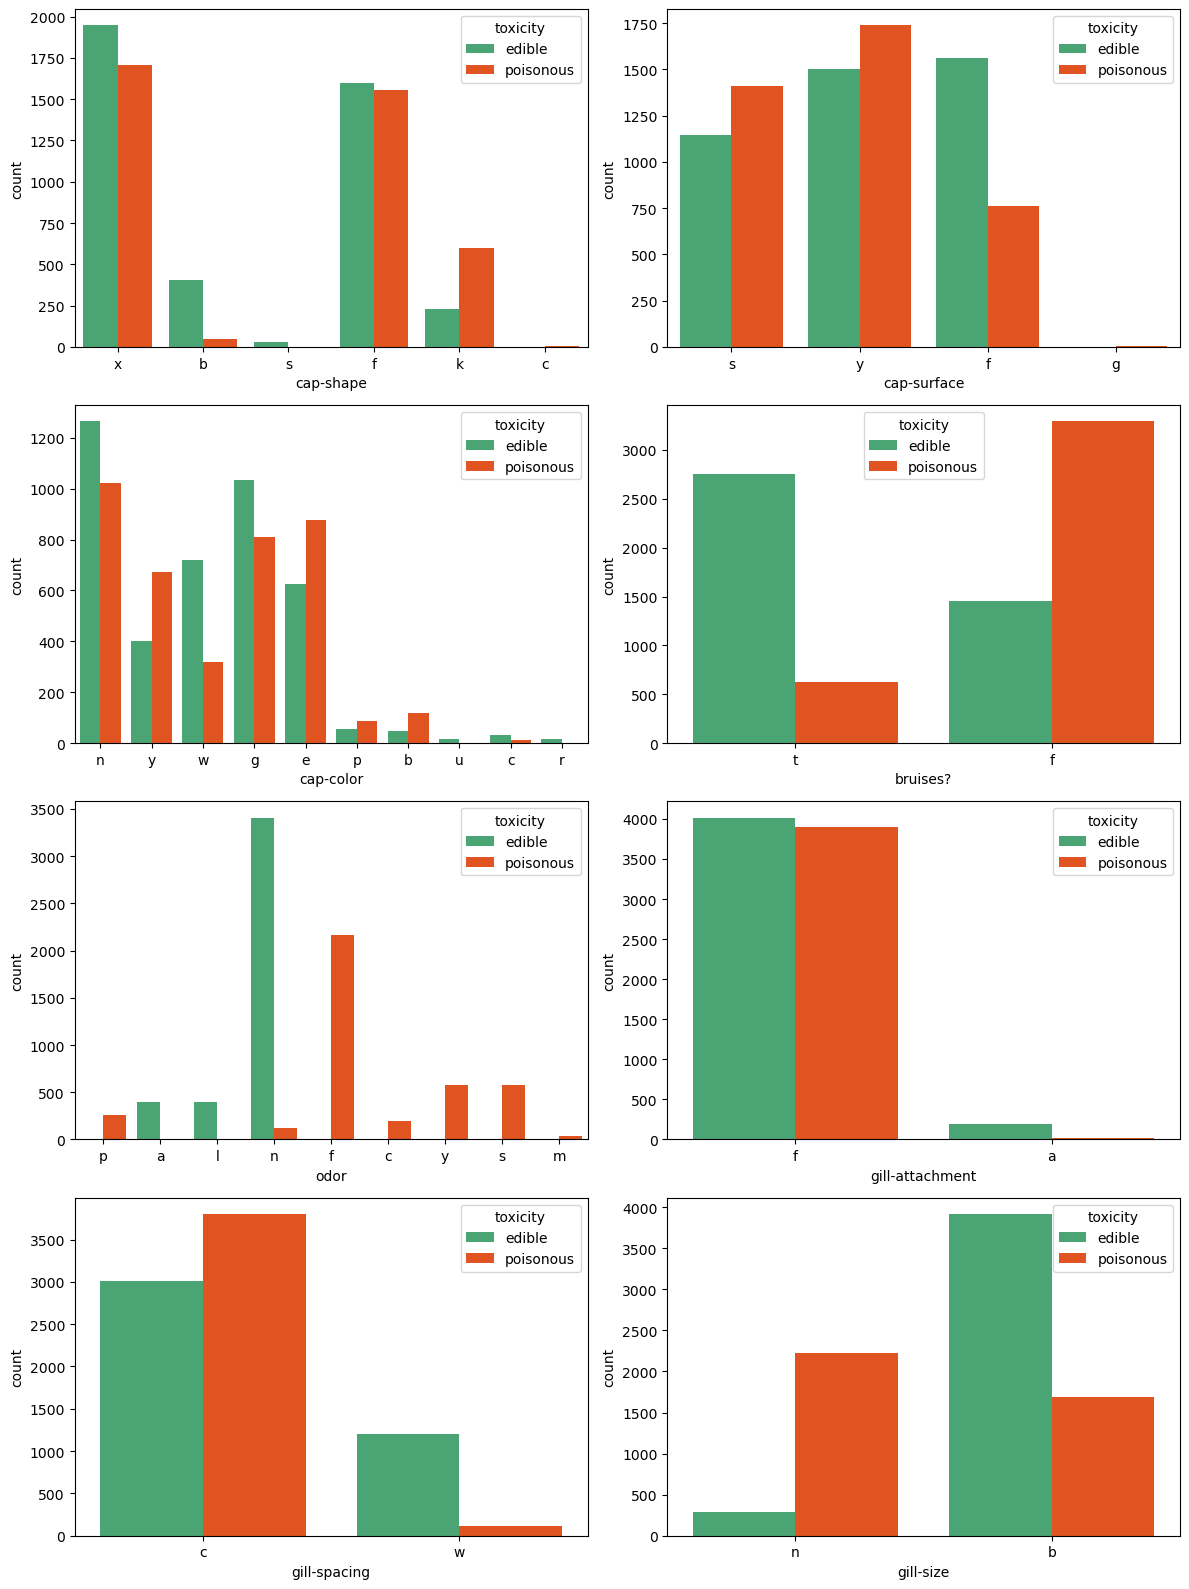

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(12, 16))

for i in range(4):
    for j in range(2):
        sns.countplot(data=df,
                      x=df.iloc[:, i*2+j+1],
                      hue='toxicity',
                      hue_order=['edible', 'poisonous'],
                      palette=['mediumseagreen','orangered'],
                      ax=ax[i,j]
                     );
plt.tight_layout()
plt.show()

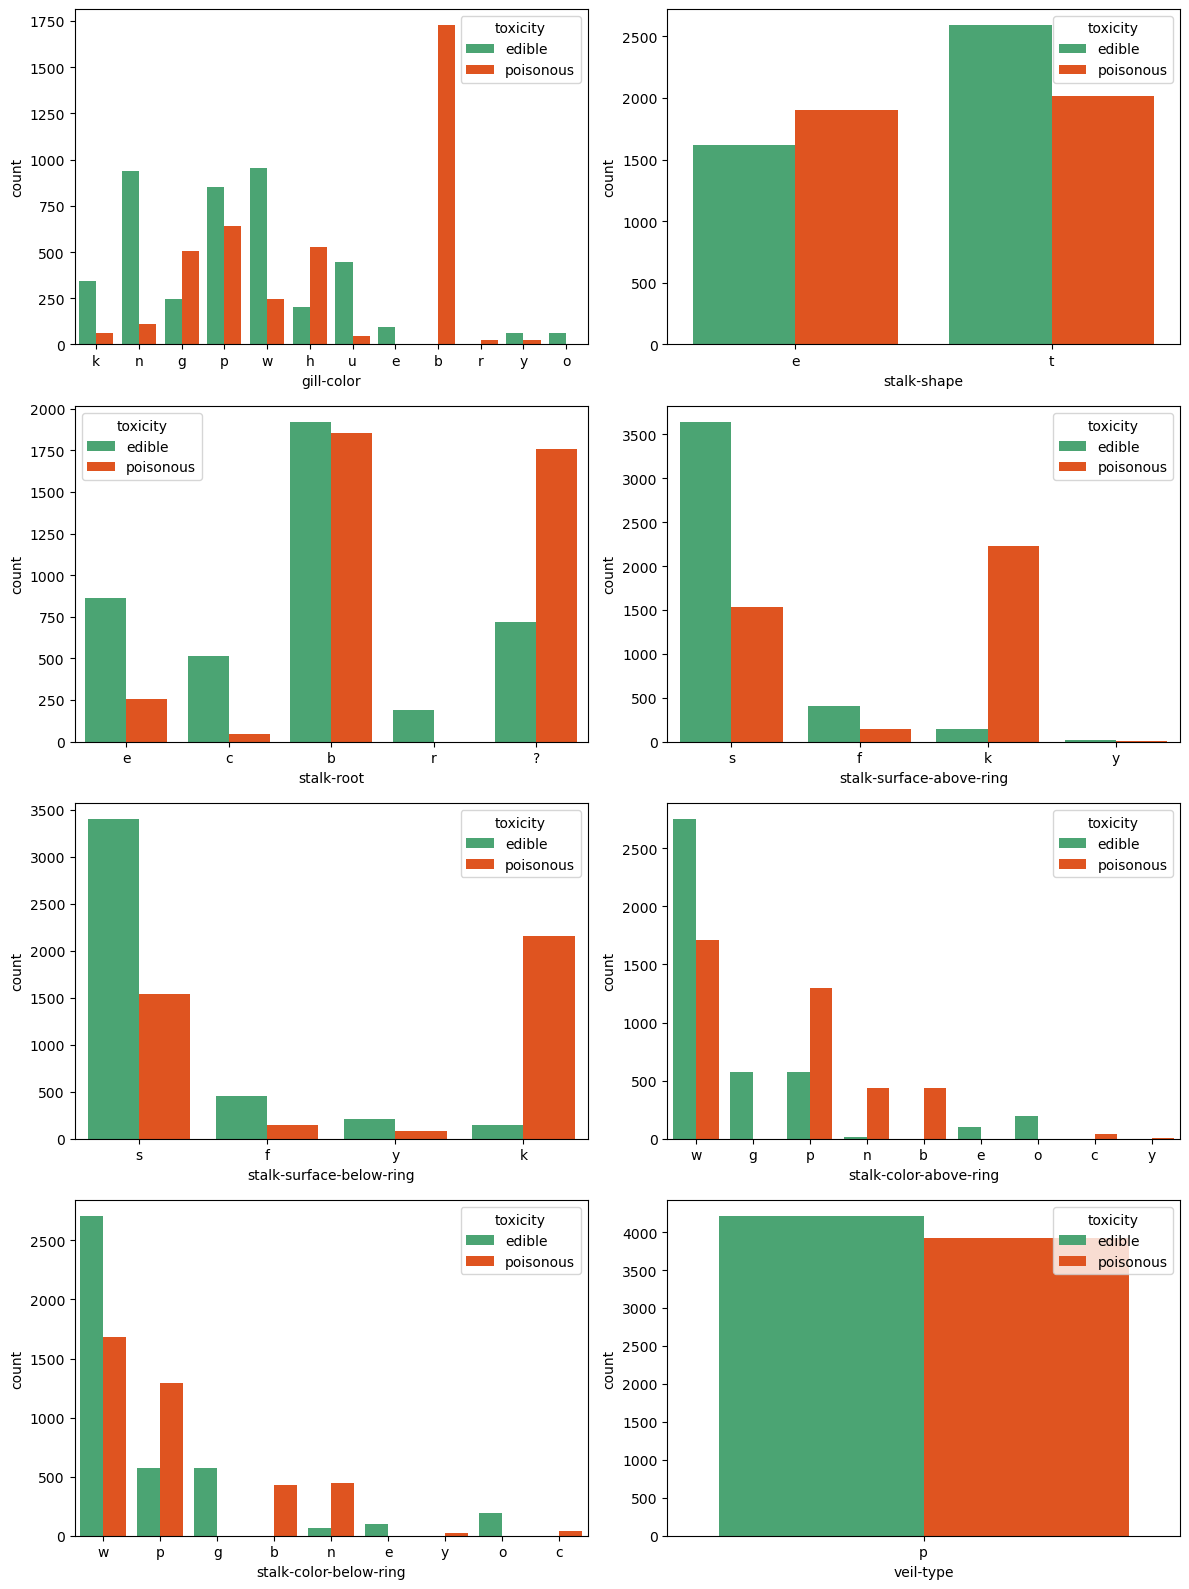

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(12, 16))

for i in range(4):
    for j in range(2):
        sns.countplot(data=df,
                      x=df.iloc[:, i*2+j+9],
                      hue='toxicity',
                      hue_order=['edible', 'poisonous'],
                      palette=['mediumseagreen','orangered'],
                      ax=ax[i,j]
                     );
plt.tight_layout()
plt.show()

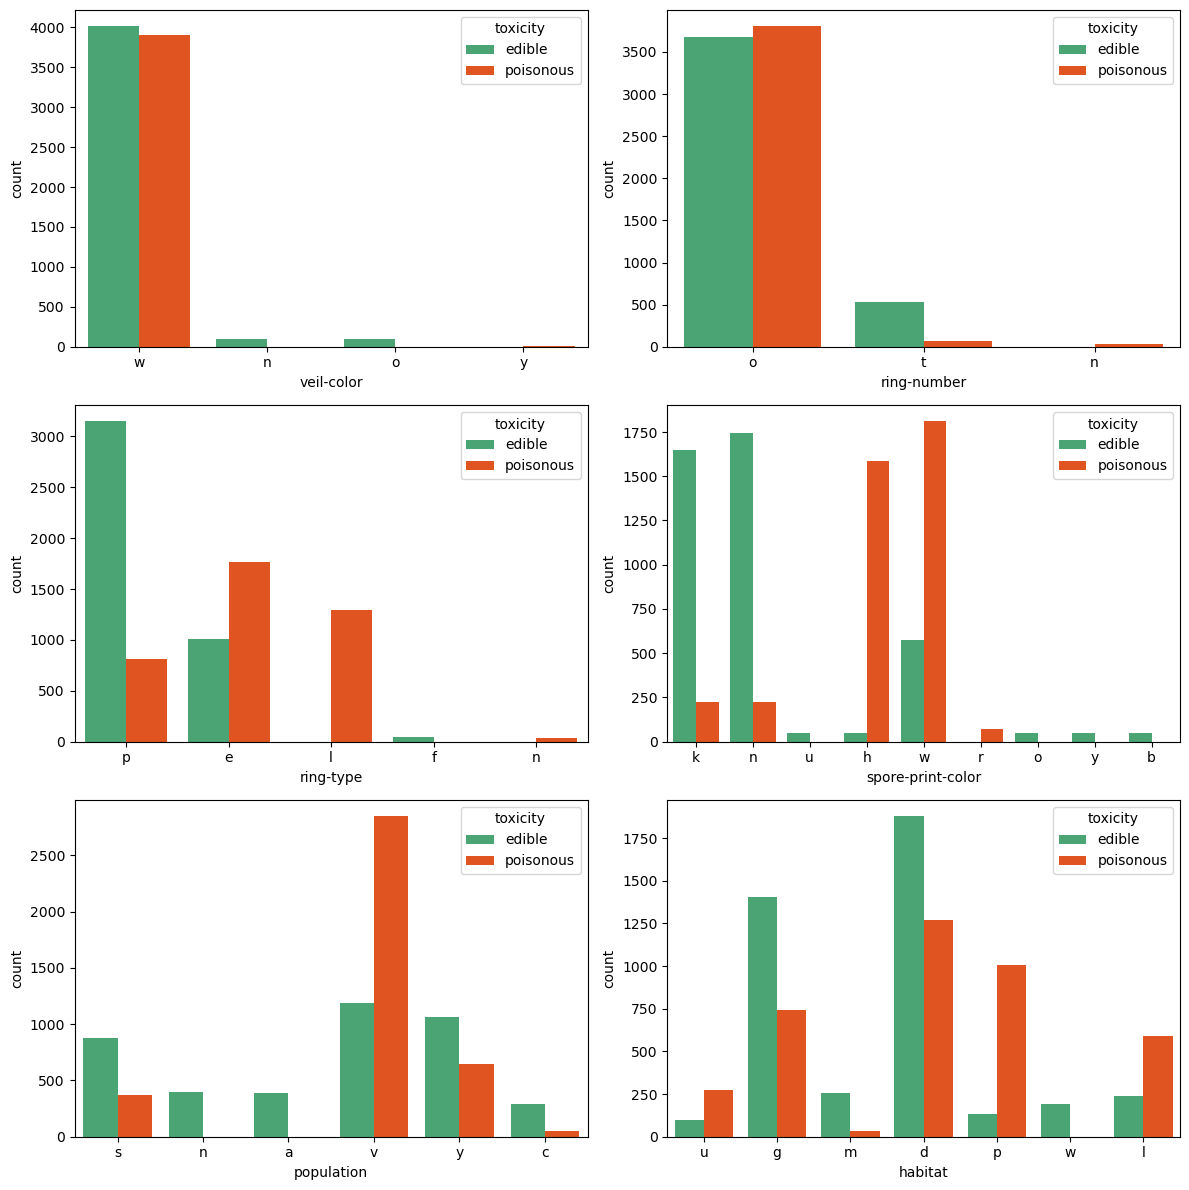

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for i in range(3):
    for j in range(2):
        sns.countplot(data=df,
                      x=df.iloc[:, i*2+j+17],
                      hue='toxicity',
                      hue_order=['edible', 'poisonous'],
                      palette=['mediumseagreen','orangered'],
                      ax=ax[i,j]
                     );
plt.tight_layout()
plt.show()

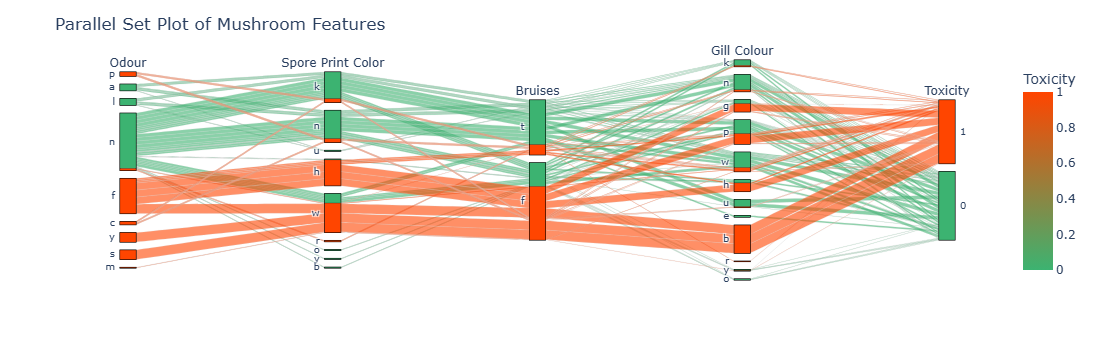

In [16]:
# Create parallel plot comprising features with categories better at distinguishing between poisonous and edible mushrooms.

df['toxicity'] = df['toxicity'].map(toxicity_mapping)

fig = px.parallel_categories(
    df,
    dimensions=['odor', 'spore-print-color', 'bruises?', 'gill-color', 'toxicity'],
    color='toxicity',
    color_continuous_scale=['mediumseagreen', 'orangered'],
    labels={'odor':'Odour', 'spore-print-color':'Spore Print Color', 'bruises?':'Bruises', 'gill-color':'Gill Colour', 'toxicity':'Toxicity'}
)

fig.update_layout(title="Parallel Set Plot of Mushroom Features")
fig.show()

<u>Observations from EDA</u>

**Cap Shape, Surface, Colour:**
* The count plots do not show any distinct correlation between the features and toxicity.

**Bruises:**
* A moderate negative correlation between the presence of bruising and toxicity may be inferred from the count plot.

**Odour:**
* There appears to be a highly distinct correlation between mushrooms without odour 'n' and its edibility. Likewise, there is also a highly distinct correlation between mushroom with a foul 'f' odour and its toxicity.

**Gill Attachment, Spacing, Size, Colour:**
* There appears to be little to no distinct correlation between the features and toxicity. However, it can be noted that mushrooms with a buff 'b' gill colour are almost always poisonous.

**Stalk Shape and Root:**
* No obvious correlation between stalk shape and toxicity. Noted that 30.53% of stalk-root values are missing, and they will be held in a standalone category labelled '?'

**Stalk Surface and Color:**
* Noted that mushrooms with a smooth ('s') stalk surface above and below ring tend to be edible, while those with a silky ('k') stalk surface tend to be poisonous. No distinct correlation between stalk color and toxicity.

**Veil Type and Color:**
* All mushrooms have a partial ('p') veil type, therefore the feature does not have any analytical or predictive utility. No distinct correlation between veil color and toxicity.

**Ring Number and Type:**
* No obvious correlations noted between ring number and toxicity. Noted that mushrooms with a pendant ('p') ring type tend to be edible, while those with a large 'l' ring type are almost certainly poisonous.

**Spore Print Color:**
* Noted several distinct correlations between certain colors and toxicity (or edibility).

**Population:**
* Noted that mushroom populations classified as several ('v') tend to be poisonous. Otherwise, mushrooms with other population types tend to be edible.

**Habitat:**
* No strong correlations noted.

<u>**Overall remarks:**</u>\
We investigated the relationships between each categorical feature and toxicity using count plots. We have observed high correlations between the categories of certain features and the toxicity of the mushrooms (e.g. 'None' in odor and various colours in spore-print-color).

Additionally, we investigated the correlations among multiple categorical features through the use of parallel set plots. The broader the lines between the different features, the stronger the connection. It is observed that most categories in 'odor' and 'spore-print-color' can classify the mushrooms into edible or poisonous with a high degree of certainty, while other features like 'veil-color' lack categories with the same discernability.

One major observation is that many features (mainly those pertaining to colours and shapes) contain multiple categories that make them good candidates for one-hot encoding. As for other features (such as gill-spacing and population), an ordered relationship may exist among the categories and hence may be better suited for ordinal encoding.

# Feature Engineering

In [19]:
# Re-import dataset
df = pd.read_csv("agaricus-lepiota.data", header=None)
df.columns = ['class',
              'cap-shape',
              'cap-surface',
              'cap-color',
              'bruises?',
              'odor',
              'gill-attachment',
              'gill-spacing',
              'gill-size',
              'gill-color',
              'stalk-shape',
              'stalk-root',
              'stalk-surface-above-ring',
              'stalk-surface-below-ring',
              'stalk-color-above-ring',
              'stalk-color-below-ring',
              'veil-type',
              'veil-color',
              'ring-number',
              'ring-type', 
              'spore-print-color',
              'population',
              'habitat'
            ]

Now to perform preprocessing of dataset before fitting the model to it. This involves performing a custom **ordinal encoding** on selected columns, and **onehot encoding** on the remaining columns.

In [21]:
# Custom Ordinal encoding
df['class'] = df['class'].map({'e': 0, 'p': 1})
df['bruises?'] = df['bruises?'].map(bruises_mapping)
df['gill-spacing'] = df['gill-spacing'].map(gill_spacing_mapping)
df['gill-size'] = df['gill-size'].map(gill_size_mapping)
df['ring-number'] = df['ring-number'].map(ring_num_mapping)
df['population'] = df['population'].map(population_mapping)

In [22]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
df_cat = pd.DataFrame(df[[
    'cap-shape',
    'cap-surface',
    'cap-color',
    'odor',
    'gill-attachment',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-type',
    'spore-print-color',
    'habitat'
]])
encoder = OneHotEncoder(sparse_output=False)
df_onehot = encoder.fit_transform(df_cat)

# Extracted feature names for onehot encoder. This is necessary for the regrouping of the onehot columns
# into the original features
onehot_columns = encoder.get_feature_names_out([
    'cap-shape',
    'cap-surface',
    'cap-color',
    'odor',
    'gill-attachment',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-type',
    'spore-print-color',
    'habitat'
])

# Adding the names to the onehot columns
df_preprocessed = pd.DataFrame(df_onehot,columns=onehot_columns)

In [23]:
# Append Ordinal encoded columns to preprocesssed dataframe
df_preprocessed[['class','bruises?','gill-spacing','gill-size','ring-number','population']] = df[['class','bruises?','gill-spacing','gill-size','ring-number','population']]
df_preprocessed

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0             0.0          0.0          0.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             1.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
8119          0.0          0.0          0.0          1.0          0.0   
8120          0.0          0.0          0.0          0.0          0.0   
8121          0.0          0.0          1.0          0.0          0.0   
8122          0.0          0.0          0.0          1.0          0.0   
8123          0.0          0.0          0.0          0.0          0.0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0             1.0            0.0            0.0            1.0            0.0   
1             1.0            0.0            0.0            1.0            0.0   
2             0.0            0.0            0.0            1.0            0.0   
3             1.0            0.0            0.0            0.0            1.0   
4             1.0            0.0            0.0            1.0            0.0   
...           ...            ...            ...            ...            ...   
8119          0.0            0.0            0.0            1.0            0.0   
8120          1.0            0.0            0.0            1.0            0.0   
8121          0.0            0.0            0.0            1.0            0.0   
8122          0.0            0.0            0.0            0.0            1.0   
8123          1.0            0.0            0.0            1.0            0.0   

      ...  habitat_m  habitat_p  habitat_u  habitat_w  class  bruises?  \
0     ...        0.0        0.0        1.0        0.0      1         1   
1     ...        0.0        0.0        0.0        0.0      0         1   
2     ...        1.0        0.0        0.0        0.0      0         1   
3     ...        0.0        0.0        1.0        0.0      1         1   
4     ...        0.0        0.0        0.0        0.0      0         0   
...   ...        ...        ...        ...        ...    ...       ...   
8119  ...        0.0        0.0        0.0        0.0      0         0   
8120  ...        0.0        0.0        0.0        0.0      0         0   
8121  ...        0.0        0.0        0.0        0.0      0         0   
8122  ...        0.0        0.0        0.0        0.0      1         0   
8123  ...        0.0        0.0        0.0        0.0      0         0   

      gill-spacing  gill-size  ring-number  population  
0                1          0            1           2  
1                1          1            1           3  
2                1          1            1           3  
3                1          0            1           2  
4                0          1            1           5  
...            ...        ...          ...         ...  
8119             1          1            1           4  
8120             1          1            1           1  
8121             1          1            1           4  
8122             1          0            1           1  
8123             1          1            1           4  

[8124 rows x 108 columns]

Finally, we will split the dataset into output and feature sets, followed by a train-test split.

In [25]:
# Split dataframe into features and output
y = df_preprocessed['class']
X = df_preprocessed.drop(columns='class')

# Supervised Analysis

The following supervised methods have been tested:
* Logistic Regression
* K-Nearest Neighbours
* Decision Tree
* Random Forest
* Naïve Bayes

In [28]:
# Test/Train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now to train the supervised model and evaluate the predictions.

In [30]:
# Importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Importing scoring metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Importing Grid Search Cross Validation library
from sklearn.model_selection import GridSearchCV

# Implementing Grid Search for the different classifiers
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'NaiveBayes': GaussianNB(),
}

# Using GridSearchCV to perform hyperparameter tuning
param_grid = {
    'LogisticRegression': {
        'max_iter': [100, 200, 300]
    },
    'KNeighbors': {
        'n_neighbors': [2, 5, 8]
    },
    'DecisionTree': {
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 4, 6]
    },
    'NaiveBayes': {
        'var_smoothing': [1e-9, 1e-7, 1e-5]
    }
}

# Define multiple performance metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

for model_name, model in models.items():
    print(f'Training {model_name}...')
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, verbose=1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Best hyperparameters and model
    print(f"Best parameters: {grid_search.best_params_}")

    # Test the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate the performance on the test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Precision: {precision * 100:.2f}%")
    print(f"Test Recall: {recall * 100:.2f}%")
    print(f"Test F1 Score: {f1 * 100:.2f}%")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("-" * 40)

Training LogisticRegression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'max_iter': 100}
Test Accuracy: 100.00%
Test Precision: 100.00%
Test Recall: 100.00%
Test F1 Score: 100.00%
Confusion Matrix:
[[1257    0]
 [   0 1181]]
----------------------------------------
Training KNeighbors...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'n_neighbors': 2}
Test Accuracy: 100.00%
Test Precision: 100.00%
Test Recall: 100.00%
Test F1 Score: 100.00%
Confusion Matrix:
[[1257    0]
 [   0 1181]]
----------------------------------------
Training DecisionTree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 2}
Test Accuracy: 100.00%
Test Precision: 100.00%
Test Recall: 100.00%
Test F1 Score: 100.00%
Confusion Matrix:
[[1257    0]
 [   0 1181]]
----------------------------------------
Training RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 13

From the above results, we conclude that Logistic Regression, K-Nearest Neighbours, Decision Tree and Random Forest methods all attained the same degree of success, obtaining perfect scores across all metrics. The Naïve Bayes method produced suboptimal results, and had a tendency of making false-positive classification errors. There was also one false-negative classification made, which may seem insignificant at first glance but could pose health risks if this classification method were scaled up to more mushrooms in a real-world problem. A single death is one too many.

For the analytical purposes, we focused solely on Decision Trees, due to its easy interpretability as compared to the other methods.

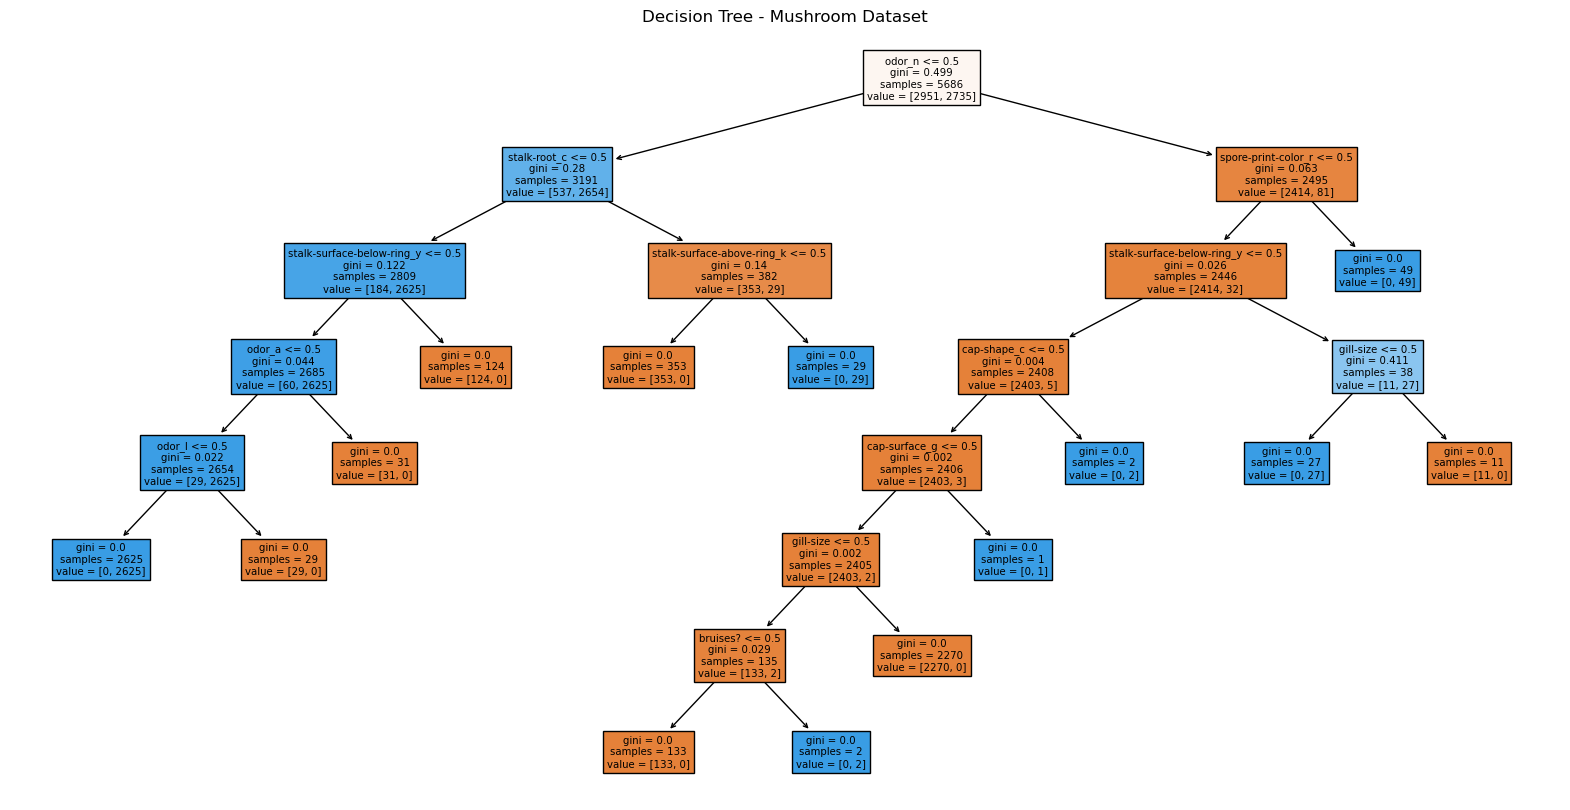

In [32]:
# Decision Tree visualisation
model = DecisionTreeClassifier(max_depth=10, min_samples_split=2)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, filled=True)
plt.title("Decision Tree - Mushroom Dataset")
plt.show()

Scikit-Learn's Decision Tree Classifier comes with a 'feature_importance_' attribute that would be useful in ranking feature importance. It should be noted that the one-hot encoded categories were used in the decision splits, and need to be regrouped back into their original feature columns.

                          Importance
Feature                             
odor                        0.671463
stalk-root                  0.174635
stalk-surface-below-ring    0.093039
spore-print-color           0.032963
stalk-surface-above-ring    0.018879


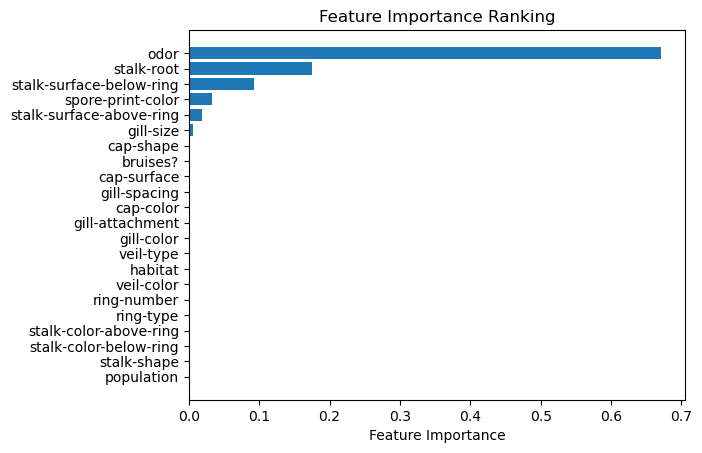

In [34]:
# Analysis of feature importance in supervised method used.

feature_names = X_train.columns

importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Regroup onehot columns back into the original feature columns
feature_importance_df = feature_importance_df.groupby(feature_importance_df['Feature'].str.split('_').str[0]).sum()
feature_importance_df = pd.DataFrame(feature_importance_df.drop(columns='Feature'))
feature_importance_df.sort_values(by=['Importance'], ascending=True, inplace=True)
print(feature_importance_df.tail().sort_values(by=['Importance'], ascending=False))

plt.barh(feature_importance_df.index, feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Ranking')
plt.show()

The odour of the mushroom is the most important predictor of whether a mushroom is edible or not, contributing to 67% of the model's predictions. This can be observed from the count plot that mushrooms with an almond ('a'), anise ('l') or no ('n') scent are highly likely to be edible. On the other hand, mushrooms having any other type of odour are almost certainly poisonous.

Meanwhile, the second most important feature is the type/shape of mushroom stalk root, accounting for 25% of the model's predictions. As observed from the count plot, mushrooms with equal ('e'), club ('c'), and rhizomorphic ('r') stalk roots are more likely to be edible. One limitation posed by this dataset is that 30.53% of the stalk-root column contains missing values. The prediction model was able to work around this by grouping these missing values under a separate category, and it can be observed that most of these observations turn out to be poisonous. However, no hard conclusion can be drawn from this, since we do not know what the actual categories are.

# Unsupervised Analysis

The following unsupervised methods have been tested:
* Hierarchical Clustering (Agglomerative)
* K-Means Clustering

Both methods achieved mediocre clustering results of a similar level. We have decided to focus on K-Means clustering, taking into consideration the easier interpretability and scaling.

In [38]:
# Importing K-Means and Agglomerative Clustering and relevant evaluation metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, homogeneity_score, completeness_score

# Import scale preprocessing
from sklearn.preprocessing import scale

# Import Principal Component Analysis
from sklearn.decomposition import PCA

**Agglomerative clustering**

In [40]:
# Preparing training data for Agglomerative Clustering (with and without PCA)
X_agglo = pd.DataFrame(X.copy(), columns=feature_names)
X_agglo_pca = pd.DataFrame(X.copy(), columns=feature_names)

pca = PCA(n_components=2)
X_agglo_pca = pca.fit_transform(X_agglo_pca)

features = {
    'before PCA': X_agglo,
    'after PCA': X_agglo_pca
}

# Listing models
models = {
    'Agglomerative Clustering (Euclidean)': AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward'),
    'Agglomerative Clustering (Hamming)': AgglomerativeClustering(n_clusters=2, metric='hamming', linkage='complete')
}

for model_name, model in models.items():
    for feature_name, feature in features.items():
        print(f"Training {model_name} {feature_name}...")
        
        model.fit(feature)

        # Evaluate the clustering
        print(f"Silhouette Score: {silhouette_score(feature, model.labels_):.2f}")
        print(f"Calinski-Harabasz Score: {calinski_harabasz_score(feature, model.labels_):.2f}")
        print(f"Homogeneity Score: {homogeneity_score(y, model.labels_):.2f}")
        print(f"Completeness Score: {completeness_score(y, model.labels_):.2f}")
        print("-" * 40)

Training Agglomerative Clustering (Euclidean) before PCA...
Silhouette Score: 0.15
Calinski-Harabasz Score: 1363.48
Homogeneity Score: 0.58
Completeness Score: 0.61
----------------------------------------
Training Agglomerative Clustering (Euclidean) after PCA...
Silhouette Score: 0.46
Calinski-Harabasz Score: 6086.42
Homogeneity Score: 0.59
Completeness Score: 0.62
----------------------------------------
Training Agglomerative Clustering (Hamming) before PCA...
Silhouette Score: 0.15
Calinski-Harabasz Score: 1364.21
Homogeneity Score: 0.55
Completeness Score: 0.57
----------------------------------------
Training Agglomerative Clustering (Hamming) after PCA...
Silhouette Score: 0.08
Calinski-Harabasz Score: 9.37
Homogeneity Score: 0.00
Completeness Score: 0.08
----------------------------------------


**K-Means clustering - before PCA**

In [42]:
X_kmeans = pd.DataFrame(scale(X.copy()), columns=feature_names)

# Fit K-Means clustering model
model = KMeans(n_clusters=2, n_init=10)
model.fit(X_kmeans)

# Evaluate the clustering
print(f"Silhouette Score: {silhouette_score(X_kmeans, model.labels_):.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_kmeans, model.labels_):.2f}")
print(f"Homogeneity Score: {homogeneity_score(y, model.labels_):.2f}")
print(f"Completeness Score: {completeness_score(y, model.labels_):.2f}")

Silhouette Score: 0.10
Calinski-Harabasz Score: 720.96
Homogeneity Score: 0.59
Completeness Score: 0.61


**K-Means clustering - using PCA**

As there are 107 features in the one-hot encoded dataset, we shall use Principal Component Analysis (PCA) to reduce high-dimensional feature space into its principal components.

In [44]:
X_kmeans = pd.DataFrame(scale(X.copy()), columns=feature_names)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans)

model = KMeans(n_clusters=2, n_init=10)
model.fit(X_pca)

print(f"Silhouette Score: {silhouette_score(X_pca, model.labels_):.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_pca, model.labels_):.2f}")
print(f"Homogeneity Score: {homogeneity_score(y, model.labels_):.2f}")
print(f"Completeness Score: {completeness_score(y, model.labels_):.2f}")

Silhouette Score: 0.59
Calinski-Harabasz Score: 6932.84
Homogeneity Score: 0.57
Completeness Score: 0.60


Following the use of PCA, it can be observed that the Silhouette score increased from 0.10 to 0.59, while the Calinski-Harabasz index increased from 720.96 to 6932.83. The Silhouette score and Calinski-Harabasz index both indicate how well-clustered the data is. The substantial increases in both suggest that PCA has helped to separate the data into more distinct and compact clusters.

While the homogeneity and completeness scores both dropped marginally following the use of PCA, this decrease is far outweighed by the significant improvement in clustering quality.

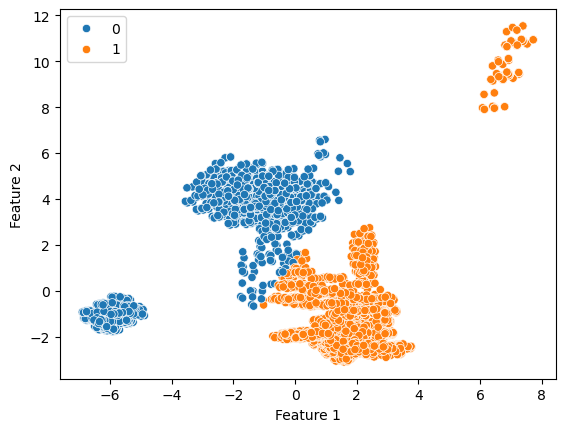

In [46]:
# Visualise the result of the clustering after using PCA
X_pca_scatter = pd.DataFrame(X_pca, columns=['Feature 1', 'Feature 2'])
sns.scatterplot(x=X_pca_scatter['Feature 1'], y=X_pca_scatter['Feature 2'], hue=model.labels_);

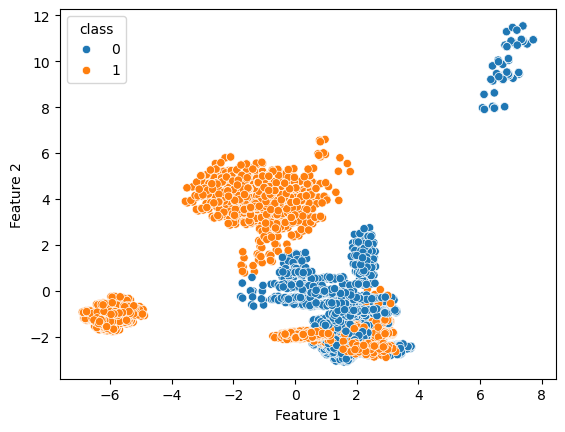

In [47]:
# Visualise the clustering using true labels for comparison
sns.scatterplot(x=X_pca_scatter['Feature 1'], y=X_pca_scatter['Feature 2'], hue=y);

Finally, we would like to understand and visualise how much each feature contributed to the variances captured by each principal component.

In [49]:
# Obtained loadings for each one-hot encoded feature, regrouped and squared them to get the percentage contribution
loadings = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2']).T
loadings = (loadings**2).groupby(loadings.index.str.split('_').str[0]).sum()

                               PC1
stalk-surface-above-ring  0.119042
stalk-surface-below-ring  0.114969
ring-type                 0.112940
odor                      0.104065
spore-print-color         0.099791


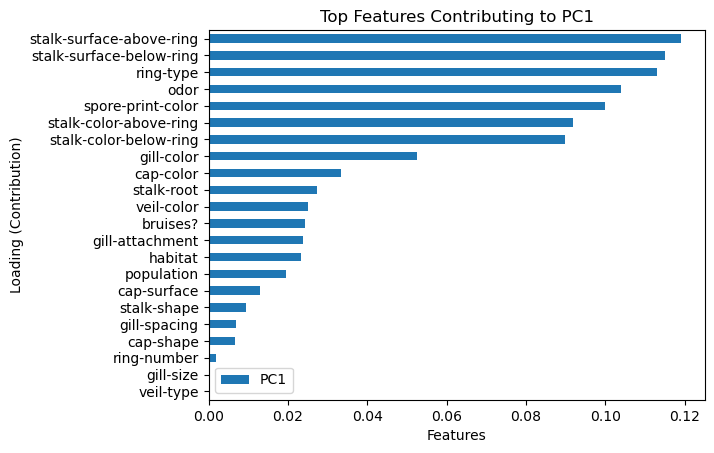

In [50]:
# Ranking features by contribution to Principal Component 1 (PC1)
top_features_pc1 = pd.DataFrame(loadings.iloc[:,0].sort_values(ascending=True))
print(top_features_pc1.tail().sort_values(by=['PC1'], ascending=False))

top_features_pc1.plot(kind='barh')
plt.title('Top Features Contributing to PC1')
plt.ylabel('Loading (Contribution)')
plt.xlabel('Features')
plt.show()

                        PC2
stalk-root         0.127292
spore-print-color  0.117307
gill-color         0.111141
habitat            0.073948
ring-type          0.069528


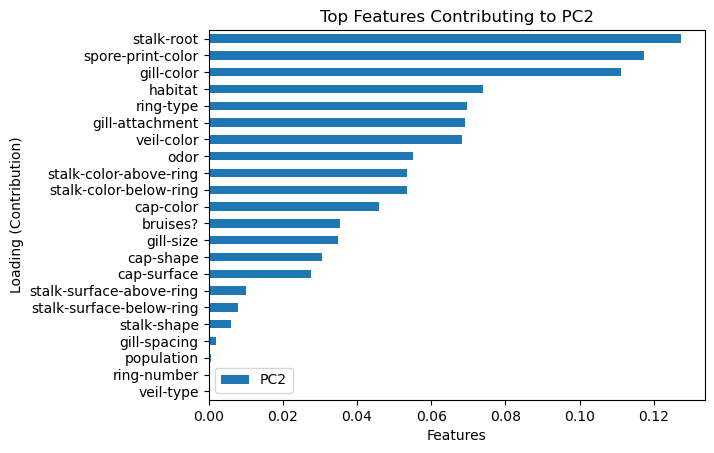

In [51]:
# Ranking features by contribution to Principal Component 2 (PC2)
top_features_pc2 = pd.DataFrame(loadings.iloc[:,1].sort_values(ascending=True))
print(top_features_pc2.tail().sort_values(by=['PC2'], ascending=False))

top_features_pc2.plot(kind='barh')
plt.title('Top Features Contributing to PC2')
plt.ylabel('Loading (Contribution)')
plt.xlabel('Features')
plt.show()